# Predict Vehicle Prices using Vehicle dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [5]:
data.shape

(1002, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [6]:
data.describe()

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


In [8]:
print(data.columns.tolist())

['name', 'description', 'make', 'model', 'year', 'price', 'engine', 'cylinders', 'fuel', 'mileage', 'transmission', 'trim', 'body', 'doors', 'exterior_color', 'interior_color', 'drivetrain']


In [9]:
data.dtypes

name               object
description        object
make               object
model              object
year                int64
price             float64
engine             object
cylinders         float64
fuel               object
mileage           float64
transmission       object
trim               object
body               object
doors             float64
exterior_color     object
interior_color     object
drivetrain         object
dtype: object

In [10]:
data.isnull().sum()

name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

In [13]:
# for  missing values:
# Numeric column: fill with median
# Categorical columns: fill with mode

numeric_col = data.select_dtypes(include=['int64','float64']).columns
categorical_col = data.select_dtypes(include=['object']).columns
data[numeric_col] = data[numeric_col].fillna(data[numeric_col].median())

for col in categorical_col:
    data[col] = data[col].fillna(data[col].mode()[0])

In [16]:
data.isnull().sum().sum()

np.int64(0)

In [17]:
print("Numerical Columns:")
print(numeric_col.tolist())

print("\n Categorical Columns:")
print(categorical_col.to_list())

Numerical Columns:
['year', 'price', 'cylinders', 'mileage', 'doors']

 Categorical Columns:
['name', 'description', 'make', 'model', 'engine', 'fuel', 'transmission', 'trim', 'body', 'exterior_color', 'interior_color', 'drivetrain']


In [20]:
for col in (categorical_col.to_list()):
    print(data[col].value_counts())
    print('*' * 40)

name
2023 Dodge Durango Pursuit               33
2024 Jeep Compass Latitude               28
2024 RAM 3500 Tradesman                  18
2024 Jeep Grand Cherokee L Limited       15
2024 Volkswagen Taos 1.5T SE             15
                                         ..
2024 Ford Maverick XLT                    1
2024 Hyundai Kona SE                      1
2024 Kia Forte LXS                        1
2024 Nissan Murano SV Intelligent AWD     1
2024 Chevrolet Silverado 2500 WT          1
Name: count, Length: 358, dtype: int64
****************************************
description
\n      \n        .\n      \n                                                                                                                                                                                                                                                                                                                                                                                                      

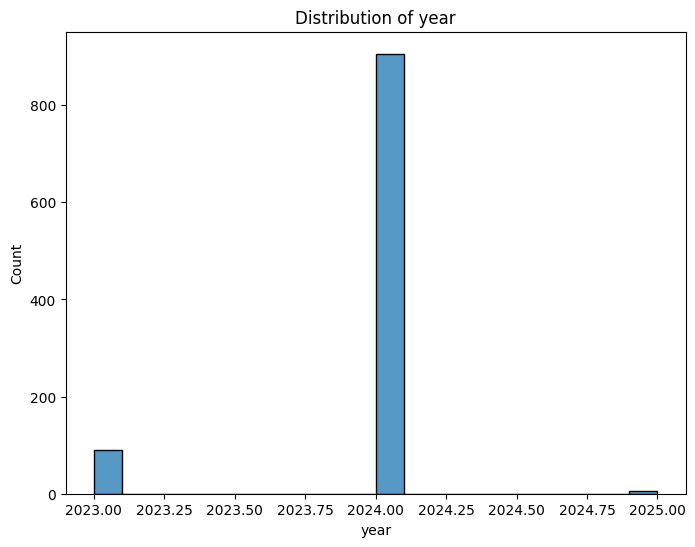

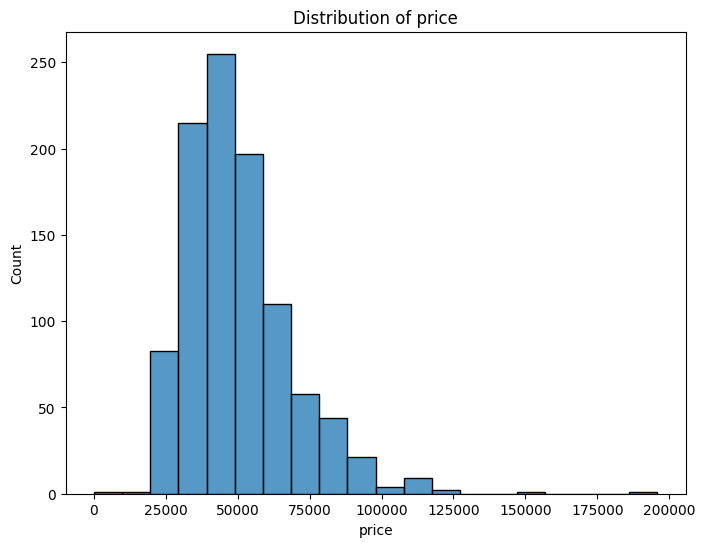

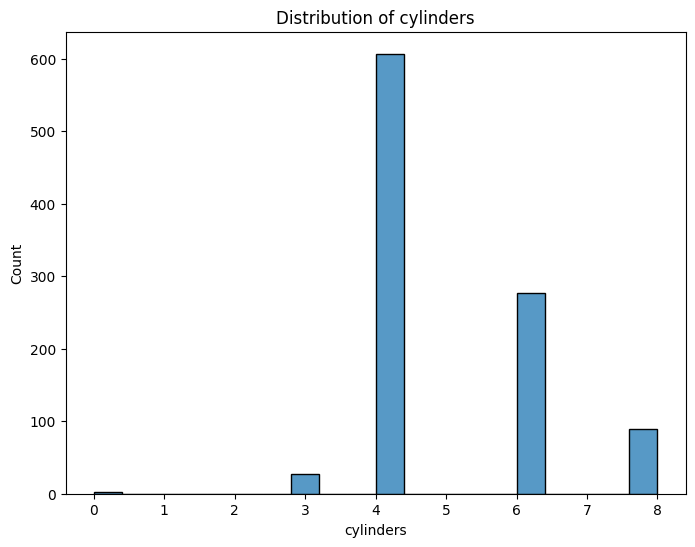

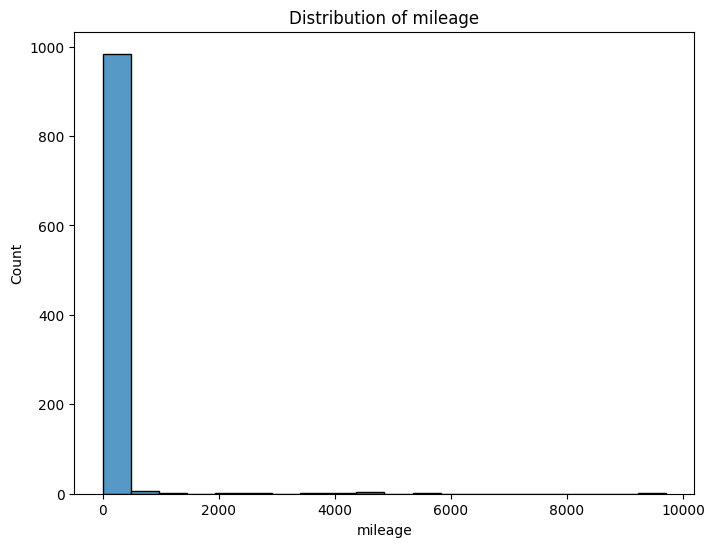

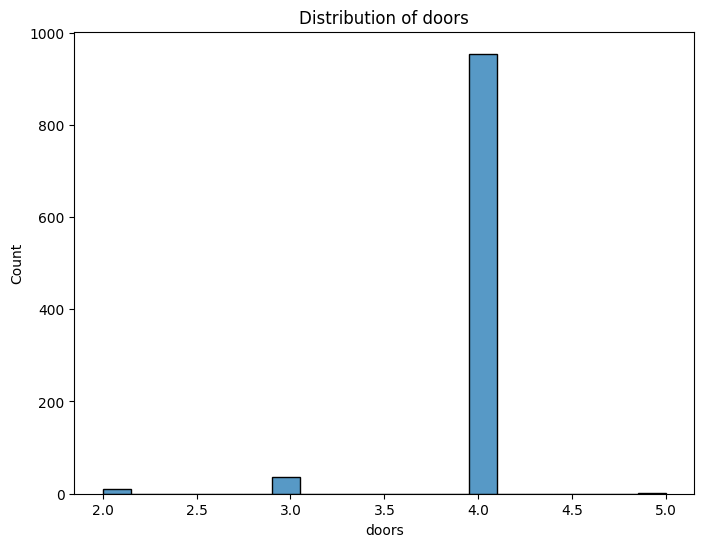

In [22]:
for col in numeric_col:
    plt.figure(figsize=(8,6))
    sns.histplot(x=data[col],data=data,bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

In [23]:
# Calculate correlation matrix for numerical features
corr_mattrix = data[numeric_col].corr()

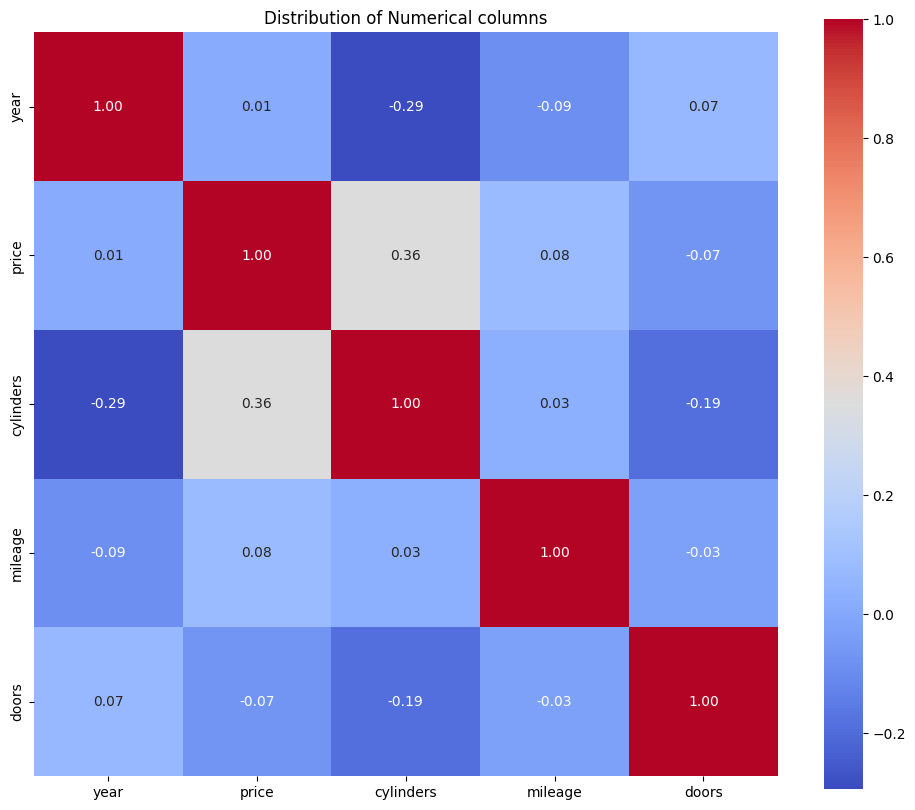

In [24]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mattrix,annot=True,fmt='.2f', square=True, cmap='coolwarm')
plt.title('Distribution of Numerical columns')
plt.show()

In [25]:
target_col = 'price'

In [26]:
correlation_with_target = corr_mattrix[target_col].sort_values(ascending=False)
print("\n Correlation with target variable: ")
print(correlation_with_target)


 Correlation with target variable: 
price        1.000000
cylinders    0.357229
mileage      0.076750
year         0.011891
doors       -0.069782
Name: price, dtype: float64


In [27]:
low_corr_features = correlation_with_target[abs(correlation_with_target<0.05)].index.tolist()
print('low correlation features:', low_corr_features)

low correlation features: ['year', 'doors']


In [28]:
# Droping low correlation features

data.drop(columns=low_corr_features,inplace=True)

In [29]:
data.head()

,name,description,make,model,price,engine,cylinders,fuel,mileage,transmission,trim,body,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,\n \n .\n \n,GMC,Yukon XL,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,Silver,Black,Four-wheel Drive


In [31]:
data.shape

(1002, 15)

In [32]:
X =data.drop(columns='price')
Y=data['price']

In [33]:
# Applying OneHotEncoding
X_encoded = pd.get_dummies(X,drop_first=True)

In [34]:
X_encoded.shape

(1002, 1998)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_encoded)

In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=537)

In [37]:
x_train.shape

(801, 1998)

In [38]:
# model 1: Linear regression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

In [39]:
# model 2: Random forest
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

In [44]:
# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n {name} Evaluation:")
    print(f"MAE  : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE : {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²   : {r2_score(y_true, y_pred):.4f}")

In [47]:
# Evaluate both models
evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Random Forest Regressor", y_test, rf_pred)


 Linear Regression Evaluation:
MAE  : 5860.56
RMSE : 9964.92
R²   : 0.6877

 Random Forest Regressor Evaluation:
MAE  : 4501.03
RMSE : 7797.73
R²   : 0.8088


## Model Visualation

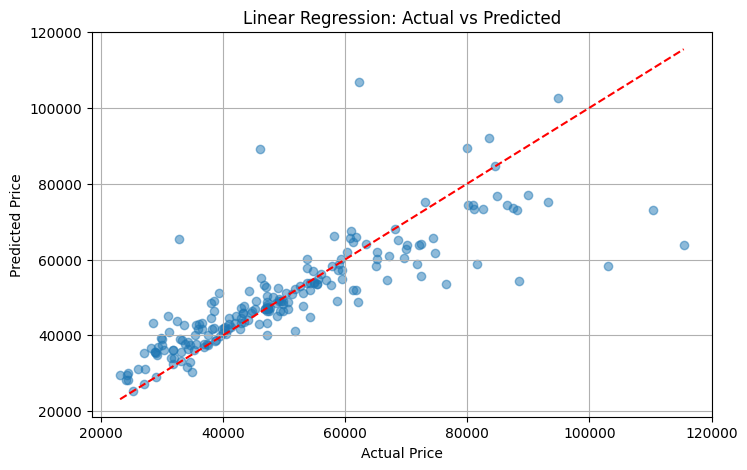

In [48]:
# Linear Regression - Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

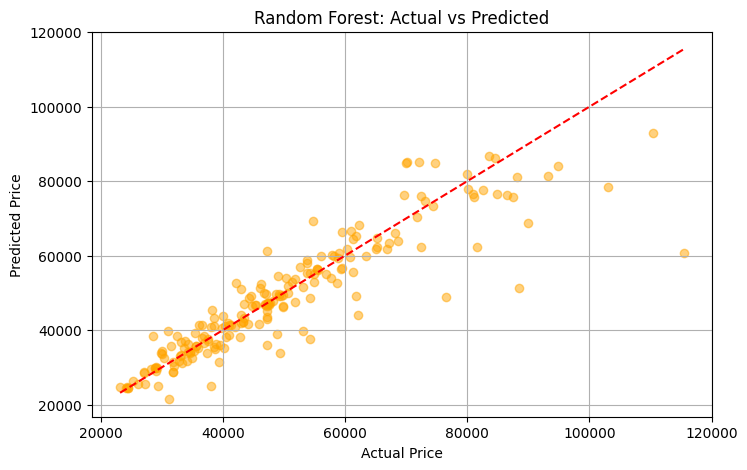

In [49]:
# Random Forest Regressor - Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, rf_pred, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True)
plt.show()

In [50]:
# Feature names after one-hot encoding
feature_names = X_encoded.columns

In [51]:
# Extract importance scores from the trained RF model
importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

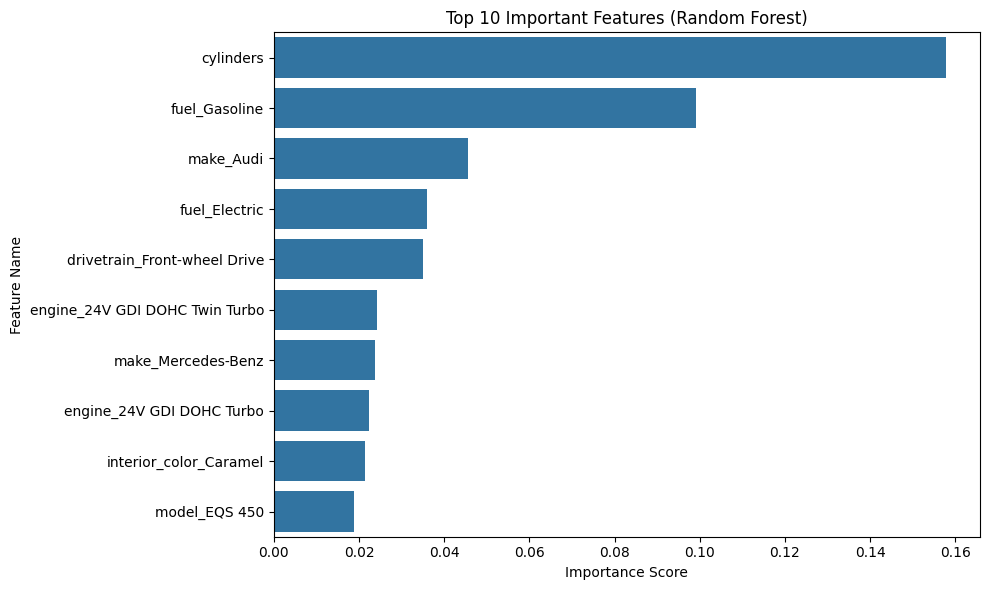

In [52]:
# Plot top 15 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()